## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
%matplotlib inline

# A. DATA

# 1. bom_movie dataframe

In [2]:
bom_movie = pd.read_csv('zippedData/bom.movie_gross.csv')
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


# 2. tmdb_movie dataframe

In [7]:
tmdb_movie = pd.read_csv('zippedData/tmdb.movies.csv')
tmdb_movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# 3. tn_movie dataframe

In [8]:
tn_movie = pd.read_csv('zippedData/tn.movie_budgets.csv')
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
tn_movie.shape

(5782, 6)

In [10]:
# turn production_budget column in numeric values:
tn_movie["production_budget"] = [str(i).replace("$", "") for i in tn_movie["production_budget"]]
tn_movie["production_budget"] = [float(str(i).replace(",", "")) for i in tn_movie["production_budget"]]

In [11]:
tn_movie["domestic_gross"] = [str(i).replace("$", "") for i in tn_movie["domestic_gross"]]
tn_movie["domestic_gross"] = [float(str(i).replace(",", "")) for i in tn_movie["domestic_gross"]]


In [12]:
tn_movie["worldwide_gross"] = [str(i).replace("$", "") for i in tn_movie["worldwide_gross"]]
tn_movie["worldwide_gross"] = [float(str(i).replace(",", "")) for i in tn_movie["worldwide_gross"]]

In [13]:
tn_movie['international_gross'] = tn_movie.worldwide_gross - tn_movie.domestic_gross
tn_movie['domestic_profit'] = tn_movie.domestic_gross - tn_movie.production_budget
tn_movie['international_profit'] = tn_movie.international_gross - tn_movie.production_budget
tn_movie['worldwide_profit'] = tn_movie.worldwide_gross - tn_movie.production_budget
tn_movie['domestic_ROI'] = (tn_movie.domestic_gross - tn_movie.production_budget)/tn_movie.production_budget
tn_movie['international_ROI'] = (tn_movie.international_gross - tn_movie.production_budget)/tn_movie.production_budget
tn_movie['worldwide_ROI'] = (tn_movie.worldwide_gross - tn_movie.production_budget)/tn_movie.production_budget

In [14]:
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,335507625.0,1.590838e+09,2.351345e+09,0.789430,3.743147,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-307237650.0,-2.430000e+08,-2.002376e+08,-0.877822,-0.694286,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,128405868.0,6.134081e+08,1.072414e+09,0.388403,1.855439,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,303181382.0,3.795404e+08,9.997217e+08,0.956408,1.197288,3.153696


# 4. rt_movie dateframe

In [15]:
rt_movie = pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t')
rt_movie.head()

,,,,,,,,,,,<<<<<<< HEAD
id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,"This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy ""Popeye"" Doyle (Hackman) and his partner, Buddy Russo (Roy Scheider), are New York City police detectives on narcotics detail, trying to track down the source of heroin from Europe into the United States. Suave Alain Charnier (Fernando Rey) is the French drug kingpin who provides a large percentage of New York City's dope, and Pierre Nicoli (Marcel Bozzuffi) is a hired killer and Charnier's right-hand man. Acting on a hunch, Popeye and Buddy start tailing Sal Boca (Tony Lo Bianco) and his wife, Angie (Arlene Faber), who live pretty high for a couple whose corner store brings in about 7,000 dollars a year. It turns out Popeye's suspicions are right -- Sal and Angie are the New York agents for Charnier, who will be smuggling 32 million dollars' worth of heroin into the city in a car shipped over from France. The French Connection broke plenty of new ground for screen thrillers; Popeye Doyle was a highly unusual ""hero,"" an often violent, racist, and mean-spirited cop whose dedication to his job fell just short of dangerous obsession. The film's high point, a high-speed car chase with Popeye tailing an elevated train, was one of the most viscerally exciting screen moments of its day and set the stage for dozens of action sequences to follow. And the film's grimy realism (and downbeat ending) was a big change from the buff-and-shine gloss and good-guys-always-win heroics of most police dramas that preceded it. The French Connection was inspired by a true story, and Eddie Egan and Sonny Grosso, Popeye and Buddy's real life counterparts, both have small roles in the film. A sequel followed four years later.",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king. As he is chauffeured across midtown Manhattan to get a haircut at his father's old barber, his anxious eyes are glued to the yuan's exchange rate: it is mounting against all expectations, destroying Eric's bet against it. Eric Packer is losing his empire with every tick of the clock. Meanwhile, an eruption of wild activity unfolds in the city's streets. Petrified as the threats of the real world infringe upon his cloud of virtual convictions, his paranoia intensifies during the course of his 24-hour cross-town odyssey. Packer starts to piece together clues that lead him to a most terrifying secret: his imminent assassination. -- (C) Official Site",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,"Illeana Douglas delivers a superb performance as Denise Waverly, a fictional singer and songwriter whose life bears more than a passing resemblance to that of real-life pop star Carole King. Edna Buxton, the daughter of a Philadelphia steel tycoon, aspires to a career as a singer, and when against her mother's bidding she sings a sultry version of ""Hey There (You With the Stars in Your Eyes)"" (instead of Mom's choice, ""You'll Never Walk Alone"") at a talent contest, she wins a recording contact and moves to New York City. She cuts a record and gains a new stage name, Denise Waverly; however, she soon finds that girl singers are a dime a dozen in the Big Apple and her career as a vocalist goes nowhere. But she has a knack for writing songs, and eccentric producer Joel Milner (John Turturro) asks her to pen some songs for his upcoming projects. 

# 5. rt_reviews dataframe

In [16]:
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv', sep='\t',encoding='latin-1')
rt_reviews.head()

/var/folders/xf/z2fcddts049dxg763n_0c6qw0000gn/T/ipykernel_4346/1384396749.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv', sep='\t',encoding='latin-1')


<<<<<<< HEAD
id review                                             rating fresh  critic         top_critic publisher                      date
3  A distinctly gallows take on contemporary finan... 3/5    fresh  PJ Nabarro     0          Patrick Nabarro   November 10, 2018
   It's an allegory in search of a meaning that ne... NaN    rotten Annalee Newitz 0          io9.com                May 23, 2018
   ... life lived in a bubble in financial dealing... NaN    fresh  Sean Axmaker   0          Stream on Demand    January 4, 2018
   Continuing along a line introduced in last year... NaN    fresh  Daniel Kasman  0          MUBI              November 16, 2017

# 6. db sql file

In [17]:
con = sqlite3.connect('zippedData/im.db')
cursor_obj = con.cursor()

In [18]:
%%bash 

sqlite3 zippedData/im.db
.tables

directors      movie_akas     movie_ratings  principals   
known_for      movie_basics   persons        writers      


# 6.1. director

In [19]:
im_query =  \
"""
SELECT *
FROM directors
"""

In [20]:
directors_df = pd.read_sql("""
SELECT *
FROM directors
""", con)

In [21]:
directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [22]:
directors_df.shape

(291174, 2)

In [23]:
directors_df['diretor_id'] = directors_df['person_id'].copy()
directors_df.head()

,movie_id,person_id,diretor_id
0,tt0285252,nm0899854,nm0899854
1,tt0462036,nm1940585,nm1940585
2,tt0835418,nm0151540,nm0151540
3,tt0835418,nm0151540,nm0151540
4,tt0878654,nm0089502,nm0089502


In [24]:
directors_df.diretor_id.nunique()

109253

In [25]:
#Remove dubplicate:
directors_df = directors_df.drop_duplicates(keep="first")
directors_df.head()

,movie_id,person_id,diretor_id
0,tt0285252,nm0899854,nm0899854
1,tt0462036,nm1940585,nm1940585
2,tt0835418,nm0151540,nm0151540
4,tt0878654,nm0089502,nm0089502
5,tt0878654,nm2291498,nm2291498


In [26]:
directors_df.shape

(163535, 3)

# 6.2. movie_akas

In [27]:
movie_akas_df = pd.read_sql("""
SELECT *
FROM movie_akas
""", con)
movie_akas_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


# 6.3. movie_ratings

In [28]:
movie_ratings_df = pd.read_sql("""
SELECT *
FROM movie_ratings
""", con)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


# 6.4. principals

In [29]:
principals_df = pd.read_sql("""
SELECT *
FROM principals
""", con)
principals_df.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


# 6.5. known_for

In [30]:
known_for_df = pd.read_sql("""
SELECT *
FROM known_for
""", con)
known_for_df.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


# 6.6. movie_basics

In [31]:
movie_basics_df = pd.read_sql("""
SELECT *
FROM movie_basics
""", con)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


# 6.7. persons

In [33]:
persons_df = pd.read_sql("""
SELECT *
FROM persons
""", con)
persons_df.head()


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


# 6.8. writers

In [34]:
writers_df = pd.read_sql("""
SELECT *
FROM writers
""", con)
writers_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


# 7. Genrelookup from https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee

In [35]:
genre_lookup_df = pd.read_csv('zippedData/genrelookup-internet.csv')
genre_lookup_df.head()

,Genre type,Genre code
0,Action,28
1,Adventure,12
2,Animation,16
3,Comedy,35
4,Crime,80


# B-WORKING DATA

In [36]:
#Merge "tn_movie" dataframe with "movie_basics":

tnmovie_basics = pd.merge(tn_movie,movie_basics_df, left_on = "movie",right_on ="primary_title", how = "left" )
tnmovie_basics.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,335507625.0,1.590838e+09,2.351345e+09,0.789430,3.743147,5.532577,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-307237650.0,-2.430000e+08,-2.002376e+08,-0.877822,-0.694286,-0.572108,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,128405868.0,6.134081e+08,1.072414e+09,0.388403,1.855439,3.243841,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,303181382.0,3.795404e+08,9.997217e+08,0.956408,1.197288,3.153696,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
tnmovie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7221 entries, 0 to 7220
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7221 non-null   int64  
 1   release_date          7221 non-null   object 
 2   movie                 7221 non-null   object 
 3   production_budget     7221 non-null   float64
 4   domestic_gross        7221 non-null   float64
 5   worldwide_gross       7221 non-null   float64
 6   international_gross   7221 non-null   float64
 7   domestic_profit       7221 non-null   float64
 8   international_profit  7221 non-null   float64
 9   worldwide_profit      7221 non-null   float64
 10  domestic_ROI          7221 non-null   float64
 11  international_ROI     7221 non-null   float64
 12  worldwide_ROI         7221 non-null   float64
 13  movie_id              3815 non-null   object 
 14  primary_title         3815 non-null   object 
 15  original_title       

In [38]:
#Combine "tnmovie_basics" with "directors_df" & "persons_df" to get director name in column "primary_name"
tnmovie_basics_directorid = pd.merge(tnmovie_basics,directors_df, left_on ='movie_id', right_on = "movie_id", how = "left")
tnmovie_basics_director = pd.merge(tnmovie_basics_directorid,persons_df, left_on ='person_id', right_on = "person_id", how = "left")
tnmovie_basics_director.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,...,original_title,start_year,runtime_minutes,genres,person_id,diretor_id,primary_name,birth_year,death_year,primary_profession
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,335507625.0,1.590838e+09,2.351345e+09,...,Abatâ,2011.0,93.0,Horror,nm3786927,nm3786927,Atsushi Wada,NaN,NaN,director
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,...,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",nm0551128,nm0551128,Rob Marshall,1960.0,NaN,"director,miscellaneous,producer"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-307237650.0,-2.430000e+08,-2.002376e+08,...,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",nm1334526,nm1334526,Simon Kinberg,1973.0,NaN,"producer,writer,director"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,128405868.0,6.134081e+08,1.072414e+09,...,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",nm0923736,nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,303181382.0,3.795404e+08,9.997217e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
tnmovie_basics_director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669 entries, 0 to 7668
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7669 non-null   int64  
 1   release_date          7669 non-null   object 
 2   movie                 7669 non-null   object 
 3   production_budget     7669 non-null   float64
 4   domestic_gross        7669 non-null   float64
 5   worldwide_gross       7669 non-null   float64
 6   international_gross   7669 non-null   float64
 7   domestic_profit       7669 non-null   float64
 8   international_profit  7669 non-null   float64
 9   worldwide_profit      7669 non-null   float64
 10  domestic_ROI          7669 non-null   float64
 11  international_ROI     7669 non-null   float64
 12  worldwide_ROI         7669 non-null   float64
 13  movie_id              4263 non-null   object 
 14  primary_title         4263 non-null   object 
 15  original_title       

In [40]:
#Combine 'tnmovie_basics_director' with 'bom_movie' & 'tmdb_movie' to get studio & popularity:
tnmovie_basics_director_studio = pd.merge(tnmovie_basics_director,bom_movie, left_on='movie', right_on = 'title', how = 'left')
tnmovie_basics_director_studio_popularity = pd.merge(tnmovie_basics_director_studio,tmdb_movie, left_on='movie', right_on = 'title', how = 'left')
tnmovie_basics_director_studio_popularity.head()                                                    

,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,...,Unnamed: 0,genre_ids,id_y,original_language,original_title_y,popularity,release_date_y,title_y,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,335507625.0,1.590838e+09,2.351345e+09,...,6.0,"[28, 12, 14, 878]",19995.0,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,...,2470.0,"[12, 28, 14]",1865.0,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-307237650.0,-2.430000e+08,-2.002376e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,128405868.0,6.134081e+08,1.072414e+09,...,14169.0,"[28, 12, 878]",99861.0,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,303181382.0,3.795404e+08,9.997217e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
tnmovie_basics_director_studio_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9399 entries, 0 to 9398
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_x                  9399 non-null   int64  
 1   release_date_x        9399 non-null   object 
 2   movie                 9399 non-null   object 
 3   production_budget     9399 non-null   float64
 4   domestic_gross_x      9399 non-null   float64
 5   worldwide_gross       9399 non-null   float64
 6   international_gross   9399 non-null   float64
 7   domestic_profit       9399 non-null   float64
 8   international_profit  9399 non-null   float64
 9   worldwide_profit      9399 non-null   float64
 10  domestic_ROI          9399 non-null   float64
 11  international_ROI     9399 non-null   float64
 12  worldwide_ROI         9399 non-null   float64
 13  movie_id              5982 non-null   object 
 14  primary_title         5982 non-null   object 
 15  original_title_x     

In [42]:
tnmovie_basics_director_studio_popularity.columns

Index(['id_x', 'release_date_x', 'movie', 'production_budget',
       'domestic_gross_x', 'worldwide_gross', 'international_gross',
       'domestic_profit', 'international_profit', 'worldwide_profit',
       'domestic_ROI', 'international_ROI', 'worldwide_ROI', 'movie_id',
       'primary_title', 'original_title_x', 'start_year', 'runtime_minutes',
       'genres', 'person_id', 'diretor_id', 'primary_name', 'birth_year',
       'death_year', 'primary_profession', 'title_x', 'studio',
       'domestic_gross_y', 'foreign_gross', 'year', 'Unnamed: 0', 'genre_ids',
       'id_y', 'original_language', 'original_title_y', 'popularity',
       'release_date_y', 'title_y', 'vote_average', 'vote_count'],
      dtype='object')

# dataframe without popularity and studio

In [227]:
#Create a subset of tnmovie_basics_director_studio_popularity with less columns:
col_without_studio_popularity = ['movie','domestic_profit', 'international_profit', 'worldwide_profit',
       'domestic_ROI', 'international_ROI', 'worldwide_ROI', 'production_budget',
       'domestic_gross_x', 'worldwide_gross', 'international_gross',
        'movie_id','primary_title','runtime_minutes',
       'genres','primary_name','primary_profession']
without_subset_tnmovie_basics_director_studio_popularity = tnmovie_basics_director_studio_popularity[col_without_studio_popularity]
without_subset_tnmovie_basics_director_studio_popularity.head()

,movie,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,production_budget,domestic_gross_x,worldwide_gross,international_gross,movie_id,primary_title,runtime_minutes,genres,primary_name,primary_profession
0,Avatar,335507625.0,1.590838e+09,2.351345e+09,0.789430,3.743147,5.532577,425000000.0,760507625.0,2.776345e+09,2.015838e+09,tt1775309,Avatar,93.0,Horror,Atsushi Wada,director
1,Pirates of the Caribbean: On Stranger Tides,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673,410600000.0,241063875.0,1.045664e+09,8.046000e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",Rob Marshall,"director,miscellaneous,producer"
2,Dark Phoenix,-307237650.0,-2.430000e+08,-2.002376e+08,-0.877822,-0.694286,-0.572108,350000000.0,42762350.0,1.497624e+08,1.070000e+08,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",Simon Kinberg,"producer,writer,director"
3,Avengers: Age of Ultron,128405868.0,6.134081e+08,1.072414e+09,0.388403,1.855439,3.243841,330600000.0,459005868.0,1.403014e+09,9.440081e+08,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",Joss Whedon,"writer,producer,director"
4,Star Wars Ep. VIII: The Last Jedi,303181382.0,3.795404e+08,9.997217e+08,0.956408,1.197288,3.153696,317000000.0,620181382.0,1.316722e+09,6.965404e+08,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
without_subset_tnmovie_basics_director_studio_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9399 entries, 0 to 9398
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie                 9399 non-null   object 
 1   domestic_profit       9399 non-null   float64
 2   international_profit  9399 non-null   float64
 3   worldwide_profit      9399 non-null   float64
 4   domestic_ROI          9399 non-null   float64
 5   international_ROI     9399 non-null   float64
 6   worldwide_ROI         9399 non-null   float64
 7   production_budget     9399 non-null   float64
 8   domestic_gross_x      9399 non-null   float64
 9   worldwide_gross       9399 non-null   float64
 10  international_gross   9399 non-null   float64
 11  movie_id              5982 non-null   object 
 12  primary_title         5982 non-null   object 
 13  runtime_minutes       5223 non-null   float64
 14  genres                5876 non-null   object 
 15  primary_name         

In [204]:
#Dropna:
without_dropna_subset_tnmovie_basics_director_studio_popularity = subset_tnmovie_basics_director_studio_popularity.dropna(axis="index")
without_dropna_subset_tnmovie_basics_director_studio_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5135 entries, 0 to 9397
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie                 5135 non-null   object 
 1   domestic_profit       5135 non-null   float64
 2   international_profit  5135 non-null   float64
 3   worldwide_profit      5135 non-null   float64
 4   domestic_ROI          5135 non-null   float64
 5   international_ROI     5135 non-null   float64
 6   worldwide_ROI         5135 non-null   float64
 7   production_budget     5135 non-null   float64
 8   domestic_gross_x      5135 non-null   float64
 9   worldwide_gross       5135 non-null   float64
 10  international_gross   5135 non-null   float64
 11  movie_id              5135 non-null   object 
 12  primary_title         5135 non-null   object 
 13  runtime_minutes       5135 non-null   float64
 14  genres                5135 non-null   object 
 15  primary_name          5135

In [205]:
#Sort string in "genres" columns in anphabet order:
without_dropna_subset_tnmovie_basics_director_studio_popularity.loc[:, 'genres'] = without_dropna_subset_tnmovie_basics_director_studio_popularity['genres'].apply(lambda x: ', '.join(sorted(x.split(', '))))
without_dropna_subset_tnmovie_basics_director_studio_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5135 entries, 0 to 9397
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie                 5135 non-null   object 
 1   domestic_profit       5135 non-null   float64
 2   international_profit  5135 non-null   float64
 3   worldwide_profit      5135 non-null   float64
 4   domestic_ROI          5135 non-null   float64
 5   international_ROI     5135 non-null   float64
 6   worldwide_ROI         5135 non-null   float64
 7   production_budget     5135 non-null   float64
 8   domestic_gross_x      5135 non-null   float64
 9   worldwide_gross       5135 non-null   float64
 10  international_gross   5135 non-null   float64
 11  movie_id              5135 non-null   object 
 12  primary_title         5135 non-null   object 
 13  runtime_minutes       5135 non-null   float64
 14  genres                5135 non-null   object 
 15  primary_name          5135

In [206]:
without_dropna_subset_tnmovie_basics_director_studio_popularity.head()

,movie,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,production_budget,domestic_gross_x,worldwide_gross,international_gross,movie_id,primary_title,runtime_minutes,genres,primary_name,primary_profession
0,Avatar,335507625.0,1.590838e+09,2.351345e+09,0.789430,3.743147,5.532577,425000000.0,760507625.0,2.776345e+09,2.015838e+09,tt1775309,Avatar,93.0,Horror,Atsushi Wada,director
1,Pirates of the Caribbean: On Stranger Tides,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673,410600000.0,241063875.0,1.045664e+09,8.046000e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",Rob Marshall,"director,miscellaneous,producer"
2,Dark Phoenix,-307237650.0,-2.430000e+08,-2.002376e+08,-0.877822,-0.694286,-0.572108,350000000.0,42762350.0,1.497624e+08,1.070000e+08,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",Simon Kinberg,"producer,writer,director"
3,Avengers: Age of Ultron,128405868.0,6.134081e+08,1.072414e+09,0.388403,1.855439,3.243841,330600000.0,459005868.0,1.403014e+09,9.440081e+08,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",Joss Whedon,"writer,producer,director"
6,Avengers: Infinity War,378815482.0,1.069319e+09,1.748134e+09,1.262718,3.564396,5.827114,300000000.0,678815482.0,2.048134e+09,1.369319e+09,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",Anthony Russo,"producer,director,writer"


In [209]:
#Copy "genres" column and create a new column called "each_genre"
without_dropna_subset_tnmovie_basics_director_studio_popularity.loc[:, 'each_genre'] = without_dropna_subset_tnmovie_basics_director_studio_popularity['genres'].copy()

In [210]:
without_dropna_subset_tnmovie_basics_director_studio_popularity.columns

Index(['movie', 'domestic_profit', 'international_profit', 'worldwide_profit',
       'domestic_ROI', 'international_ROI', 'worldwide_ROI',
       'production_budget', 'domestic_gross_x', 'worldwide_gross',
       'international_gross', 'movie_id', 'primary_title', 'runtime_minutes',
       'genres', 'primary_name', 'primary_profession', 'each_genre'],
      dtype='object')

In [212]:
#Split "each_genre" row into multiple rows:
split_without_dropna_subset_tnmovie_basics_director_studio_popularity = without_dropna_subset_tnmovie_basics_director_studio_popularity.set_index(['movie','domestic_profit', 'international_profit', 'worldwide_profit',
       'domestic_ROI', 'international_ROI', 'worldwide_ROI',
       'production_budget', 'domestic_gross_x', 'worldwide_gross',
       'international_gross', 'movie_id', 'primary_title',
       'runtime_minutes', 'genres', 'primary_name', 'primary_profession']).apply(lambda x: x.str.split(',').explode()).reset_index()
# split_row_dropna_subset_tnmovie_basics_director_studio_popularity.head()

In [213]:
#Split "genres" column into multiple columns:
split_without_dropna_subset_tnmovie_basics_director_studio_popularity[['main_genre','sub_genre1','sub_genre2']] = split_dropna_subset_tnmovie_basics_director_studio_popularity.genres.str.split(",",expand=True)
split_without_dropna_subset_tnmovie_basics_director_studio_popularity.head()

,movie,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,production_budget,domestic_gross_x,worldwide_gross,...,movie_id,primary_title,runtime_minutes,genres,primary_name,primary_profession,each_genre,main_genre,sub_genre1,sub_genre2
0,Avatar,335507625.0,1.590838e+09,2.351345e+09,0.789430,3.743147,5.532577,425000000.0,760507625.0,2.776345e+09,...,tt1775309,Avatar,93.0,Horror,Atsushi Wada,director,Horror,Horror,None,None
1,Pirates of the Caribbean: On Stranger Tides,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673,410600000.0,241063875.0,1.045664e+09,...,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",Rob Marshall,"director,miscellaneous,producer",Action,Action,Adventure,Fantasy
2,Pirates of the Caribbean: On Stranger Tides,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673,410600000.0,241063875.0,1.045664e+09,...,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",Rob Marshall,"director,miscellaneous,producer",Adventure,Action,Adventure,Fantasy
3,Pirates of the Caribbean: On Stranger Tides,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673,410600000.0,241063875.0,1.045664e+09,...,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",Rob Marshall,"director,miscellaneous,producer",Fantasy,Action,Adventure,Fantasy
4,Dark Phoenix,-307237650.0,-2.430000e+08,-2.002376e+08,-0.877822,-0.694286,-0.572108,350000000.0,42762350.0,1.497624e+08,...,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",Simon Kinberg,"producer,writer,director",Action,Action,Adventure,Sci-Fi


In [214]:
split_without_dropna_subset_tnmovie_basics_director_studio_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10755 entries, 0 to 10754
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie                 10755 non-null  object 
 1   domestic_profit       10755 non-null  float64
 2   international_profit  10755 non-null  float64
 3   worldwide_profit      10755 non-null  float64
 4   domestic_ROI          10755 non-null  float64
 5   international_ROI     10755 non-null  float64
 6   worldwide_ROI         10755 non-null  float64
 7   production_budget     10755 non-null  float64
 8   domestic_gross_x      10755 non-null  float64
 9   worldwide_gross       10755 non-null  float64
 10  international_gross   10755 non-null  float64
 11  movie_id              10755 non-null  object 
 12  primary_title         10755 non-null  object 
 13  runtime_minutes       10755 non-null  float64
 14  genres                10755 non-null  object 
 15  primary_name       

# Dataframe with studio and popularity

In [251]:
#Create a subset of tnmovie_basics_director_studio_popularity with less columns:
col__studio_popularity = ['movie','domestic_profit', 'international_profit', 'worldwide_profit',
       'domestic_ROI', 'international_ROI', 'worldwide_ROI', 'production_budget',
       'domestic_gross_x', 'worldwide_gross', 'international_gross',
        'movie_id','primary_title','runtime_minutes',
       'genres','primary_name','primary_profession', "studio", "popularity"]
with_studio_subset_tnmovie_basics_director_studio_popularity = tnmovie_basics_director_studio_popularity[col__studio_popularity]
with_studio_subset_tnmovie_basics_director_studio_popularity.head()

,movie,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,production_budget,domestic_gross_x,worldwide_gross,international_gross,movie_id,primary_title,runtime_minutes,genres,primary_name,primary_profession,studio,popularity
0,Avatar,335507625.0,1.590838e+09,2.351345e+09,0.789430,3.743147,5.532577,425000000.0,760507625.0,2.776345e+09,2.015838e+09,tt1775309,Avatar,93.0,Horror,Atsushi Wada,director,NaN,26.526
1,Pirates of the Caribbean: On Stranger Tides,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673,410600000.0,241063875.0,1.045664e+09,8.046000e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",Rob Marshall,"director,miscellaneous,producer",BV,30.579
2,Dark Phoenix,-307237650.0,-2.430000e+08,-2.002376e+08,-0.877822,-0.694286,-0.572108,350000000.0,42762350.0,1.497624e+08,1.070000e+08,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",Simon Kinberg,"producer,writer,director",NaN,NaN
3,Avengers: Age of Ultron,128405868.0,6.134081e+08,1.072414e+09,0.388403,1.855439,3.243841,330600000.0,459005868.0,1.403014e+09,9.440081e+08,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",Joss Whedon,"writer,producer,director",BV,44.383
4,Star Wars Ep. VIII: The Last Jedi,303181382.0,3.795404e+08,9.997217e+08,0.956408,1.197288,3.153696,317000000.0,620181382.0,1.316722e+09,6.965404e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
with_studio_subset_tnmovie_basics_director_studio_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9399 entries, 0 to 9398
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie                 9399 non-null   object 
 1   domestic_profit       9399 non-null   float64
 2   international_profit  9399 non-null   float64
 3   worldwide_profit      9399 non-null   float64
 4   domestic_ROI          9399 non-null   float64
 5   international_ROI     9399 non-null   float64
 6   worldwide_ROI         9399 non-null   float64
 7   production_budget     9399 non-null   float64
 8   domestic_gross_x      9399 non-null   float64
 9   worldwide_gross       9399 non-null   float64
 10  international_gross   9399 non-null   float64
 11  movie_id              5982 non-null   object 
 12  primary_title         5982 non-null   object 
 13  runtime_minutes       5223 non-null   float64
 14  genres                5876 non-null   object 
 15  primary_name         

In [258]:
#Dropna:
drop_with_studio_subset_tnmovie_basics_director_studio_popularity = with_studio_subset_tnmovie_basics_director_studio_popularity.dropna(axis="index")
drop_with_studio_subset_tnmovie_basics_director_studio_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2172 entries, 1 to 9320
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie                 2172 non-null   object 
 1   domestic_profit       2172 non-null   float64
 2   international_profit  2172 non-null   float64
 3   worldwide_profit      2172 non-null   float64
 4   domestic_ROI          2172 non-null   float64
 5   international_ROI     2172 non-null   float64
 6   worldwide_ROI         2172 non-null   float64
 7   production_budget     2172 non-null   float64
 8   domestic_gross_x      2172 non-null   float64
 9   worldwide_gross       2172 non-null   float64
 10  international_gross   2172 non-null   float64
 11  movie_id              2172 non-null   object 
 12  primary_title         2172 non-null   object 
 13  runtime_minutes       2172 non-null   float64
 14  genres                2172 non-null   object 
 15  primary_name          2172

In [259]:
drop_with_studio_subset_tnmovie_basics_director_studio_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2172 entries, 1 to 9320
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie                 2172 non-null   object 
 1   domestic_profit       2172 non-null   float64
 2   international_profit  2172 non-null   float64
 3   worldwide_profit      2172 non-null   float64
 4   domestic_ROI          2172 non-null   float64
 5   international_ROI     2172 non-null   float64
 6   worldwide_ROI         2172 non-null   float64
 7   production_budget     2172 non-null   float64
 8   domestic_gross_x      2172 non-null   float64
 9   worldwide_gross       2172 non-null   float64
 10  international_gross   2172 non-null   float64
 11  movie_id              2172 non-null   object 
 12  primary_title         2172 non-null   object 
 13  runtime_minutes       2172 non-null   float64
 14  genres                2172 non-null   object 
 15  primary_name          2172

In [260]:
#Copy "genres" column and create a new column called "each_genre"
drop_with_studio_subset_tnmovie_basics_director_studio_popularity.loc[:, 'each_genre'] = drop_with_studio_subset_tnmovie_basics_director_studio_popularity['genres'].copy()
drop_with_studio_subset_tnmovie_basics_director_studio_popularity.head()

,movie,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,production_budget,domestic_gross_x,worldwide_gross,international_gross,movie_id,primary_title,runtime_minutes,genres,primary_name,primary_profession,studio,popularity,each_genre
1,Pirates of the Caribbean: On Stranger Tides,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673,410600000.0,241063875.0,1.045664e+09,8.046000e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",Rob Marshall,"director,miscellaneous,producer",BV,30.579,"Action,Adventure,Fantasy"
3,Avengers: Age of Ultron,128405868.0,6.134081e+08,1.072414e+09,0.388403,1.855439,3.243841,330600000.0,459005868.0,1.403014e+09,9.440081e+08,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",Joss Whedon,"writer,producer,director",BV,44.383,"Action,Adventure,Sci-Fi"
6,Avengers: Infinity War,378815482.0,1.069319e+09,1.748134e+09,1.262718,3.564396,5.827114,300000000.0,678815482.0,2.048134e+09,1.369319e+09,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",Anthony Russo,"producer,director,writer",BV,80.773,"Action,Adventure,Sci-Fi"
7,Avengers: Infinity War,378815482.0,1.069319e+09,1.748134e+09,1.262718,3.564396,5.827114,300000000.0,678815482.0,2.048134e+09,1.369319e+09,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",Joe Russo,"producer,director,writer",BV,80.773,"Action,Adventure,Sci-Fi"
9,Justice League,-70975705.0,1.269209e+08,3.559452e+08,-0.236586,0.423070,1.186484,300000000.0,229024295.0,6.559452e+08,4.269209e+08,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",Zack Snyder,"producer,director,writer",WB,34.953,"Action,Adventure,Fantasy"


In [257]:
split_with_studio_subset_tnmovie_basics_director_studio_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2172 entries, 1 to 9320
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie                 2172 non-null   object 
 1   domestic_profit       2172 non-null   float64
 2   international_profit  2172 non-null   float64
 3   worldwide_profit      2172 non-null   float64
 4   domestic_ROI          2172 non-null   float64
 5   international_ROI     2172 non-null   float64
 6   worldwide_ROI         2172 non-null   float64
 7   production_budget     2172 non-null   float64
 8   domestic_gross_x      2172 non-null   float64
 9   worldwide_gross       2172 non-null   float64
 10  international_gross   2172 non-null   float64
 11  movie_id              2172 non-null   object 
 12  primary_title         2172 non-null   object 
 13  runtime_minutes       2172 non-null   float64
 14  genres                2172 non-null   object 
 15  primary_name          2172

In [261]:
drop_with_studio_subset_tnmovie_basics_director_studio_popularity.columns

Index(['movie', 'domestic_profit', 'international_profit', 'worldwide_profit',
       'domestic_ROI', 'international_ROI', 'worldwide_ROI',
       'production_budget', 'domestic_gross_x', 'worldwide_gross',
       'international_gross', 'movie_id', 'primary_title', 'runtime_minutes',
       'genres', 'primary_name', 'primary_profession', 'studio', 'popularity',
       'each_genre'],
      dtype='object')

In [265]:
#Split "each_genre" row into multiple rows:
split_drop_with_studio_subset_tnmovie_basics_director_studio_popularity = drop_with_studio_subset_tnmovie_basics_director_studio_popularity.set_index(['movie', 'domestic_profit', 'international_profit', 'worldwide_profit',
       'domestic_ROI', 'international_ROI', 'worldwide_ROI',
       'production_budget', 'domestic_gross_x', 'worldwide_gross',
       'international_gross', 'movie_id', 'primary_title', 'runtime_minutes',
       'genres', 'primary_name', 'primary_profession', 'studio', 'popularity']).apply(lambda x: x.str.split(',').explode()).reset_index()
# split_drop_with_studio_subset_tnmovie_basics_director_studio_popularity.head()

In [263]:
#Split "genres" column into multiple columns:
split_drop_with_studio_subset_tnmovie_basics_director_studio_popularity[['main_genre','sub_genre1','sub_genre2']] = split_drop_with_studio_subset_tnmovie_basics_director_studio_popularity.genres.str.split(",",expand=True)
split_drop_with_studio_subset_tnmovie_basics_director_studio_popularity.head()

,movie,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,production_budget,domestic_gross_x,worldwide_gross,...,runtime_minutes,genres,primary_name,primary_profession,studio,popularity,each_genre,main_genre,sub_genre1,sub_genre2
0,Pirates of the Caribbean: On Stranger Tides,-169536125.0,394000000.0,6.350639e+08,-0.412899,0.959571,1.546673,410600000.0,241063875.0,1.045664e+09,...,136.0,"Action,Adventure,Fantasy",Rob Marshall,"director,miscellaneous,producer",BV,30.579,Action,Action,Adventure,Fantasy
1,Pirates of the Caribbean: On Stranger Tides,-169536125.0,394000000.0,6.350639e+08,-0.412899,0.959571,1.546673,410600000.0,241063875.0,1.045664e+09,...,136.0,"Action,Adventure,Fantasy",Rob Marshall,"director,miscellaneous,producer",BV,30.579,Adventure,Action,Adventure,Fantasy
2,Pirates of the Caribbean: On Stranger Tides,-169536125.0,394000000.0,6.350639e+08,-0.412899,0.959571,1.546673,410600000.0,241063875.0,1.045664e+09,...,136.0,"Action,Adventure,Fantasy",Rob Marshall,"director,miscellaneous,producer",BV,30.579,Fantasy,Action,Adventure,Fantasy
3,Avengers: Age of Ultron,128405868.0,613408095.0,1.072414e+09,0.388403,1.855439,3.243841,330600000.0,459005868.0,1.403014e+09,...,141.0,"Action,Adventure,Sci-Fi",Joss Whedon,"writer,producer,director",BV,44.383,Action,Action,Adventure,Sci-Fi
4,Avengers: Age of Ultron,128405868.0,613408095.0,1.072414e+09,0.388403,1.855439,3.243841,330600000.0,459005868.0,1.403014e+09,...,141.0,"Action,Adventure,Sci-Fi",Joss Whedon,"writer,producer,director",BV,44.383,Adventure,Action,Adventure,Sci-Fi


In [266]:
split_drop_with_studio_subset_tnmovie_basics_director_studio_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5071 entries, 0 to 5070
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie                 5071 non-null   object 
 1   domestic_profit       5071 non-null   float64
 2   international_profit  5071 non-null   float64
 3   worldwide_profit      5071 non-null   float64
 4   domestic_ROI          5071 non-null   float64
 5   international_ROI     5071 non-null   float64
 6   worldwide_ROI         5071 non-null   float64
 7   production_budget     5071 non-null   float64
 8   domestic_gross_x      5071 non-null   float64
 9   worldwide_gross       5071 non-null   float64
 10  international_gross   5071 non-null   float64
 11  movie_id              5071 non-null   object 
 12  primary_title         5071 non-null   object 
 13  runtime_minutes       5071 non-null   float64
 14  genres                5071 non-null   object 
 15  primary_name         

# Rename "dropna_subset_tnmovie_basics_director_studio_popularity" as "working_data"

In [274]:
without_working_data_before_split = without_dropna_subset_tnmovie_basics_director_studio_popularity
without_working_data_before_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5135 entries, 0 to 9397
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie                 5135 non-null   object 
 1   domestic_profit       5135 non-null   float64
 2   international_profit  5135 non-null   float64
 3   worldwide_profit      5135 non-null   float64
 4   domestic_ROI          5135 non-null   float64
 5   international_ROI     5135 non-null   float64
 6   worldwide_ROI         5135 non-null   float64
 7   production_budget     5135 non-null   float64
 8   domestic_gross_x      5135 non-null   float64
 9   worldwide_gross       5135 non-null   float64
 10  international_gross   5135 non-null   float64
 11  movie_id              5135 non-null   object 
 12  primary_title         5135 non-null   object 
 13  runtime_minutes       5135 non-null   float64
 14  genres                5135 non-null   object 
 15  primary_name          5135

In [215]:
without_working_data = split_without_dropna_subset_tnmovie_basics_director_studio_popularity

In [244]:
without_working_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10755 entries, 0 to 10754
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie                 10755 non-null  object 
 1   domestic_profit       10755 non-null  float64
 2   international_profit  10755 non-null  float64
 3   worldwide_profit      10755 non-null  float64
 4   domestic_ROI          10755 non-null  float64
 5   international_ROI     10755 non-null  float64
 6   worldwide_ROI         10755 non-null  float64
 7   production_budget     10755 non-null  float64
 8   domestic_gross_x      10755 non-null  float64
 9   worldwide_gross       10755 non-null  float64
 10  international_gross   10755 non-null  float64
 11  movie_id              10755 non-null  object 
 12  primary_title         10755 non-null  object 
 13  runtime_minutes       10755 non-null  float64
 14  genres                10755 non-null  object 
 15  primary_name       

In [270]:
studio_working_data_before_split = split_with_studio_subset_tnmovie_basics_director_studio_popularity
studio_working_data_before_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2172 entries, 1 to 9320
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie                 2172 non-null   object 
 1   domestic_profit       2172 non-null   float64
 2   international_profit  2172 non-null   float64
 3   worldwide_profit      2172 non-null   float64
 4   domestic_ROI          2172 non-null   float64
 5   international_ROI     2172 non-null   float64
 6   worldwide_ROI         2172 non-null   float64
 7   production_budget     2172 non-null   float64
 8   domestic_gross_x      2172 non-null   float64
 9   worldwide_gross       2172 non-null   float64
 10  international_gross   2172 non-null   float64
 11  movie_id              2172 non-null   object 
 12  primary_title         2172 non-null   object 
 13  runtime_minutes       2172 non-null   float64
 14  genres                2172 non-null   object 
 15  primary_name          2172

In [275]:
studio_working_data = split_drop_with_studio_subset_tnmovie_basics_director_studio_popularity
studio_working_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5071 entries, 0 to 5070
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie                 5071 non-null   object 
 1   domestic_profit       5071 non-null   float64
 2   international_profit  5071 non-null   float64
 3   worldwide_profit      5071 non-null   float64
 4   domestic_ROI          5071 non-null   float64
 5   international_ROI     5071 non-null   float64
 6   worldwide_ROI         5071 non-null   float64
 7   production_budget     5071 non-null   float64
 8   domestic_gross_x      5071 non-null   float64
 9   worldwide_gross       5071 non-null   float64
 10  international_gross   5071 non-null   float64
 11  movie_id              5071 non-null   object 
 12  primary_title         5071 non-null   object 
 13  runtime_minutes       5071 non-null   float64
 14  genres                5071 non-null   object 
 15  primary_name         

# Working

In [217]:
without_working_data.describe()

,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,production_budget,domestic_gross_x,worldwide_gross,international_gross,runtime_minutes
count,1.075500e+04,1.075500e+04,1.075500e+04,10755.000000,10755.000000,10755.000000,1.075500e+04,1.075500e+04,1.075500e+04,1.075500e+04,10755.000000
mean,1.221762e+07,3.339256e+07,8.344329e+07,1.144326,3.025878,5.170204,3.783311e+07,5.005073e+07,1.212764e+08,7.122567e+07,97.057276
std,6.025654e+07,1.094698e+08,1.870184e+08,8.130775,14.977616,19.312716,5.114144e+07,8.587232e+07,2.241491e+08,1.445404e+08,28.100329
min,-3.072376e+08,-2.430000e+08,-2.002376e+08,-1.000000,-1.000000,-1.000000,1.400000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,-1.131992e+07,-9.718244e+06,-2.300000e+06,-0.936986,-0.975113,-0.642680,5.000000e+06,2.637040e+05,2.684207e+06,1.464000e+05,87.000000
50%,-8.500000e+05,-7.646760e+05,1.384413e+07,-0.287620,-0.259603,0.716785,1.800000e+07,1.680901e+07,3.783166e+07,1.415973e+07,98.000000
75%,2.007074e+07,2.852507e+07,7.345048e+07,0.721429,0.998559,3.022382,4.650000e+07,5.501173e+07,1.167733e+08,6.266932e+07,112.000000
max,5.000596e+08,1.590838e+09,2.351345e+09,226.644100,191.544289,415.564740,4.250000e+08,7.605076e+08,2.776345e+09,2.015838e+09,360.000000


In [218]:
without_working_data.columns

Index(['movie', 'domestic_profit', 'international_profit', 'worldwide_profit',
       'domestic_ROI', 'international_ROI', 'worldwide_ROI',
       'production_budget', 'domestic_gross_x', 'worldwide_gross',
       'international_gross', 'movie_id', 'primary_title', 'runtime_minutes',
       'genres', 'primary_name', 'primary_profession', 'each_genre',
       'main_genre', 'sub_genre1', 'sub_genre2'],
      dtype='object')

In [219]:
conditioned_working_data = without_working_data[working_data.each_genre == "Fantasy"]

In [220]:
conditioned_working_data.worldwide_ROI.mean()

5.759424019025796

In [173]:
meangenre_working_data = working_data.groupby('each_genre').mean(numeric_only = True).sort_values('worldwide_ROI',ascending = False)
meangenre_working_data.style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross_x': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})


,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,production_budget,domestic_gross_x,worldwide_gross,international_gross,runtime_minutes
each_genre,,,,,,,,,,,
Musical,"129,004,172.79","178,891,413.93","360,154,603.11",6.07,8.49,15.56,"52,259,016.39","181,263,189.18","412,413,619.51","231,150,430.33",105.49
Documentary,"7,499,283.29","17,057,402.32","54,769,852.32",0.58,8.68,10.26,"30,213,166.72","37,712,450.00","84,983,019.04","47,270,569.03",58.60
Family,"35,506,322.60","63,859,609.92","147,027,247.05",1.96,7.14,10.10,"47,661,314.53","83,167,637.13","194,688,561.58","111,520,924.45",78.63
Horror,"9,251,164.91","15,852,425.77","44,818,480.02",3.36,3.82,8.18,"19,714,889.34","28,966,054.25","64,533,369.36","35,567,315.11",94.52
Sport,"23,164,251.16","24,731,681.98","72,547,416.19",4.18,1.70,6.88,"24,651,483.05","47,815,734.21","97,198,899.25","49,383,165.03",97.10
Animation,"35,726,211.06","117,056,767.39","231,466,630.14",0.67,5.05,6.73,"78,683,651.68","114,409,862.74","310,150,281.82","195,740,419.08",87.91
History,"2,405,440.78","9,827,540.44","51,381,731.22",1.19,4.52,6.70,"39,148,750.00","41,554,190.78","90,530,481.22","48,976,290.44",87.05
Mystery,"8,521,226.62","14,881,912.28","45,897,747.13",2.99,2.69,6.68,"22,494,608.22","31,015,834.85","68,392,355.35","37,376,520.50",99.85
Romance,"12,898,123.45","19,061,113.88","53,793,739.28",1.41,3.74,6.15,"21,834,501.95","34,732,625.40","75,628,241.24","40,895,615.83",100.03


In [ ]:
without_dropna_subset_tnmovie_basics_director_studio_popularity

In [172]:
# working_data.each_genre.value_counts()

In [175]:
meandirector_working_data = working_data.groupby('primary_name').mean(numeric_only = True).sort_values('worldwide_ROI',ascending = False)
meandirector_working_data.style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross_x': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})


,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,production_budget,domestic_gross_x,worldwide_gross,international_gross,runtime_minutes
primary_name,,,,,,,,,,,
Travis Cluff,"22,664,410.00","18,792,064.00","41,556,474.00",226.64,187.92,415.56,"100,000.00","22,764,410.00","41,656,474.00","18,892,064.00",81.00
Chris Lofing,"22,664,410.00","18,792,064.00","41,556,474.00",226.64,187.92,415.56,"100,000.00","22,764,410.00","41,656,474.00","18,892,064.00",81.00
Sébastien Lifshitz,"101,939,000.00","164,345,000.00","267,142,000.00",118.81,191.54,311.35,"858,000.00","102,797,000.00","268,000,000.00","165,203,000.00",58.00
Sujit Mondal,"116,235,147.00","106,764,853.00","224,000,000.00",116.24,106.76,224.00,"1,000,000.00","117,235,147.00","225,000,000.00","107,764,853.00",136.00
Chad Zuver,"6,804,155.50","6,843,000.00","15,804,155.50",52.71,77.95,131.66,"2,157,000.00","8,961,155.50","17,961,155.50","9,000,000.00",79.00
Karthik Chandan,"183,437,486.00","-1,488,000.00","183,437,486.00",123.28,-1.00,123.28,"1,488,000.00","184,925,486.00","184,925,486.00",0.00,49.00
Chris Stokes,"23,644,000.00","-250,000.00","23,644,000.00",94.58,-1.00,94.58,"250,000.00","23,894,000.00","23,894,000.00",0.00,75.00
Levan Gabriadze,"31,789,645.00","30,574,553.00","63,364,198.00",31.79,30.57,63.36,"1,000,000.00","32,789,645.00","64,364,198.00","31,574,553.00",83.00
Coodie,"31,059,560.00","-500,000.00","31,059,560.00",62.12,-1.00,62.12,"500,000.00","31,559,560.00","31,559,560.00",0.00,79.00


In [176]:
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [177]:
from scipy.stats import percentileofscore

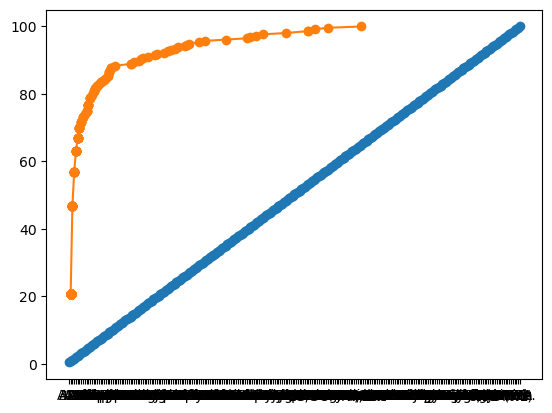

In [195]:
a = bom_movie.studio.value_counts()
x = list(a.index)
y = list(a.values)
x_percentiles = [percentileofscore(x, value) for value in x]
y_percentiles = [percentileofscore(y, value) for value in y]
sorted_x, sorted_x_percentiles = zip(*sorted(zip(x, x_percentiles)))
sorted_y, sorted_y_percentiles = zip(*sorted(zip(y, y_percentiles)))

fig, ax = plt.subplots()
ax.plot(sorted_x, sorted_x_percentiles, marker='o', label='Studio')
ax.plot(sorted_y, sorted_y_percentiles, marker='o', label='Number of movies')



In [194]:
x

['IFC',
 'Uni.',
 'WB',
 'Fox',
 'Magn.',
 'SPC',
 'Sony',
 'BV',
 'LGF',
 'Par.',
 'Eros',
 'Wein.',
 'CL',
 'Strand',
 'FoxS',
 'RAtt.',
 'KL',
 'Focus',
 'WGUSA',
 'CJ',
 'MBox',
 'UTV',
 'A24',
 'WB (NL)',
 'FM',
 'LG/S',
 'Cohen',
 'ORF',
 'SGem',
 'Rela.',
 'FIP',
 'STX',
 'GK',
 'Gold.',
 'TriS',
 'Osci.',
 'RTWC',
 'BST',
 'MNE',
 'EOne',
 'Distrib.',
 'Drft.',
 'Anch.',
 'Relbig.',
 'CBS',
 'Zeit.',
 'BG',
 'Sum.',
 'FD',
 'W/Dim.',
 'Yash',
 'Trib.',
 'Orch.',
 'FCW',
 'FRun',
 'FUN',
 'Free',
 'Elev.',
 'Scre.',
 'Vari.',
 'CGld',
 'PNT',
 'Lorb.',
 'Abr.',
 'P/DW',
 'FR',
 'Fathom',
 'VE',
 'Mont.',
 'Kino',
 'NGE',
 'Amazon',
 'Vita.',
 'Cdgm.',
 'Rialto',
 'AF',
 'Jan.',
 'Annapurna',
 'LGP',
 'TFA',
 'PFR',
 'Alc',
 'Ampl.',
 'BH Tilt',
 'Grav.',
 'VPD',
 'IM',
 'EC',
 'ENTMP',
 'Over.',
 'Icar.',
 'Neon',
 'Crnth',
 'BWP',
 'SD',
 'SM',
 'WHE',
 'CLS',
 'Imag.',
 'ParV',
 'ATO',
 'MR',
 'NM',
 'BBC',
 'PDA',
 'CZ',
 'LD',
 'Ghop',
 'Pala.',
 'CE',
 'Shout!',
 'MGM',
 'H

In [276]:
meangenre_working_data = studio_working_data.groupby('each_genre').mean(numeric_only = True).sort_values('worldwide_ROI',ascending = False)
meangenre_working_data.style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross_x': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})


,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,production_budget,domestic_gross_x,worldwide_gross,international_gross,runtime_minutes,popularity
each_genre,,,,,,,,,,,,
Horror,"18,622,475.74","29,362,595.11","69,855,652.94",5.87,5.52,12.38,"21,870,582.09","40,493,057.83","91,726,235.03","51,233,177.20",95.64,10.397750
Mystery,"13,729,496.36","23,935,577.92","65,450,202.63",5.85,5.34,12.19,"27,785,128.35","41,514,624.71","93,235,330.98","51,720,706.27",102.15,11.869622
Sport,"54,036,374.69","60,399,290.79","150,397,203.94",4.42,4.06,9.48,"35,961,538.46","89,997,913.15","186,358,742.40","96,360,829.25",108.65,9.615731
Thriller,"10,768,040.01","36,521,038.50","81,908,561.52",3.48,3.69,8.17,"34,619,483.01","45,387,523.03","116,528,044.54","71,140,521.51",104.11,11.508493
Romance,"17,118,942.38","25,536,911.20","62,331,261.73",2.50,2.63,6.12,"19,675,408.16","36,794,350.54","82,006,669.90","45,212,319.36",103.71,9.510845
Fantasy,"1,160,761.14","72,389,825.59","150,366,376.21",1.24,1.58,3.82,"76,815,789.47","77,976,550.62","227,182,165.68","149,205,615.07",109.91,15.314744
Comedy,"27,981,665.48","57,582,715.04","130,911,456.28",1.21,1.29,3.50,"45,347,075.76","73,328,741.24","176,258,532.03","102,929,790.80",101.28,11.846045
Drama,"9,078,537.12","17,172,731.77","53,827,153.53",1.02,1.10,3.12,"27,575,884.64","36,654,421.76","81,403,038.17","44,748,616.41",108.98,10.593578
Music,"18,213,137.16","25,416,319.64","59,736,353.34",0.85,1.07,2.91,"16,106,896.55","34,320,033.71","75,843,249.90","41,523,216.19",105.93,9.633241
